In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# Step 1: Import libraries and load dataset
import pandas as pd

# Load dataset (only one sheet now)
file_path = "GLM DATASET.xlsx"
df = pd.read_excel(file_path)

# Show shape and first few rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (307, 331)


,Unnamed: 0,Clinical data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Molecular data,Unnamed: 9,...,Unnamed: 321,Unnamed: 322,Unnamed: 323,Unnamed: 324,Unnamed: 325,Unnamed: 326,Unnamed: 327,Unnamed: 328,Unnamed: 329,Unnamed: 330
0,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
1,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.613,759.807,6062.5131,2080.1343,7140.3398,10055.3807,30969.163,9261.5901
2,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
3,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.467,6655.3614,730.4312,9499.7415,7289.422,20114.1557,18329.4385
4,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.043,22488.9192,12954.6539


In [5]:
# Step 2: Fix headers and clean dataset

# Use the first row as column headers
df.columns = df.iloc[0]   # set row 0 as header
df = df.drop(index=0)     # drop the header row from data

# Drop columns that are still unnamed
df = df.loc[:, ~df.columns.astype(str).str.contains("^Unnamed")]

# Reset index
df = df.reset_index(drop=True)

print("Shape after cleaning:", df.shape)
df.head()

Shape after cleaning: (306, 331)


,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.613,759.807,6062.5131,2080.1343,7140.3398,10055.3807,30969.163,9261.5901
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.467,6655.3614,730.4312,9499.7415,7289.422,20114.1557,18329.4385
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.043,22488.9192,12954.6539
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.424


In [6]:
# Step 3: Separate clinical vs molecular features

# Define clinical columns we want to keep
clinical_cols = [
    "Case", "years_to_birth", "gender", "histological_type", 
    "race", "ethnicity", "radiation_therapy", "Grade", 
    "Mutation.Count", "Percent.aneuploidy"
]

# Extract clinical and molecular data
clinical_df = df[clinical_cols].copy()
molecular_df = df.drop(columns=clinical_cols, errors="ignore")

print("Clinical shape:", clinical_df.shape)
print("Molecular shape:", molecular_df.shape)

# Show first few rows
clinical_df.head()


Clinical shape: (306, 10)
Molecular shape: (306, 321)


,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349


In [7]:
# Step 4: Preprocess clinical data

from sklearn.preprocessing import LabelEncoder

# Copy clinical data
clinical_proc = clinical_df.copy()

# Encode categorical features
categorical_cols = ["gender", "histological_type", "race", "ethnicity", "radiation_therapy", "Grade"]

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    clinical_proc[col] = le.fit_transform(clinical_proc[col].astype(str))
    le_dict[col] = le  # save encoders in case we need inverse mapping

# Handle missing values (if any)
clinical_proc = clinical_proc.fillna(clinical_proc.median(numeric_only=True))

print("Encoded clinical data shape:", clinical_proc.shape)
clinical_proc.head()


Encoded clinical data shape: (306, 10)


,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy
0,TCGA-CS-4938,31,0,0,2,1,0,0,15,0.069412
1,TCGA-CS-6665,51,0,0,2,1,1,1,75,0.524814
2,TCGA-CS-6666,22,1,0,2,1,1,1,18,0.403165
3,TCGA-DB-5270,38,0,1,2,1,0,1,16,0.061382
4,TCGA-DB-5273,33,1,0,2,1,1,1,16,0.017349


In [8]:
# Step 5: Combine clinical + molecular data for ML

# Drop non-numeric ID column "Case"
clinical_proc = clinical_proc.drop(columns=["Case"], errors="ignore")

# Target variable
y = clinical_proc["Grade"]

# Features: clinical (except Grade) + molecular
X = pd.concat([
    clinical_proc.drop(columns=["Grade"]),
    molecular_df.apply(pd.to_numeric, errors="coerce")
], axis=1)

# Fill missing values in gene data
X = X.fillna(X.median(numeric_only=True))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

X.head()


Features shape: (306, 329)
Target shape: (306,)


,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Mutation.Count,Percent.aneuploidy,IDH.status,outcome,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,31,0,0,2,1,0,15,0.069412,NaN,1,...,1455.8422,1825.0472,1514.6130,759.8070,6062.5131,2080.1343,7140.3398,10055.3807,30969.1630,9261.5901
1,51,0,0,2,1,1,75,0.524814,NaN,1,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,22,1,0,2,1,1,18,0.403165,NaN,1,...,1088.2018,2360.8727,905.4451,804.4670,6655.3614,730.4312,9499.7415,7289.4220,20114.1557,18329.4385
3,38,0,1,2,1,0,16,0.061382,NaN,1,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.0430,22488.9192,12954.6539
4,33,1,0,2,1,1,16,0.017349,NaN,1,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.4240


In [9]:
# Step 6: Prepare final dataset for ML

# Drop IDH.status and outcome (since they are labels, not features)
X = X.drop(columns=["IDH.status", "outcome"], errors="ignore")

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (244, 327) Test shape: (62, 327)


Accuracy on Test Data: 0.6774193548387096

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        30
           1       0.67      0.75      0.71        32

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.68      0.68      0.68        62



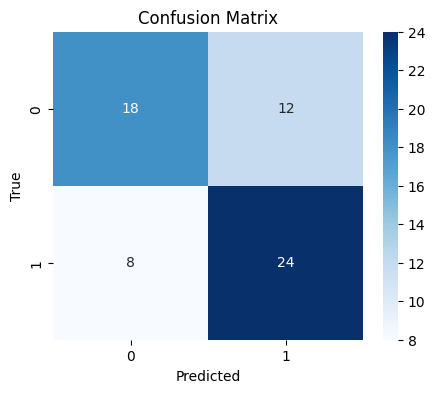

In [10]:
# Step 7: Train Random Forest model for Grade prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


                Feature  Importance
5     radiation_therapy    0.016760
6        Mutation.Count    0.015872
208               CCNB1    0.014814
245              IGFBP2    0.013322
302                SHC1    0.013247
237               FOXM1    0.013136
34                Bax_p    0.012500
7    Percent.aneuploidy    0.012497
219               CHEK2    0.012166
215                CDK1    0.011856
200                BCL2    0.010278
205               BRCA2    0.010040
195                BAK1    0.009177
271                PCNA    0.009166
221              COL6A1    0.008575
114         PKC-alpha_p    0.007915
292               RAD51    0.007283
83              HSP70_p    0.007273
218               CHEK1    0.007195
116   PKC-delta_pS664_p    0.006829


C:\Users\abhil\AppData\Local\Temp\ipykernel_2540\3917858274.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp['Importance'].head(15), y=feat_imp['Feature'].head(15), palette="viridis")


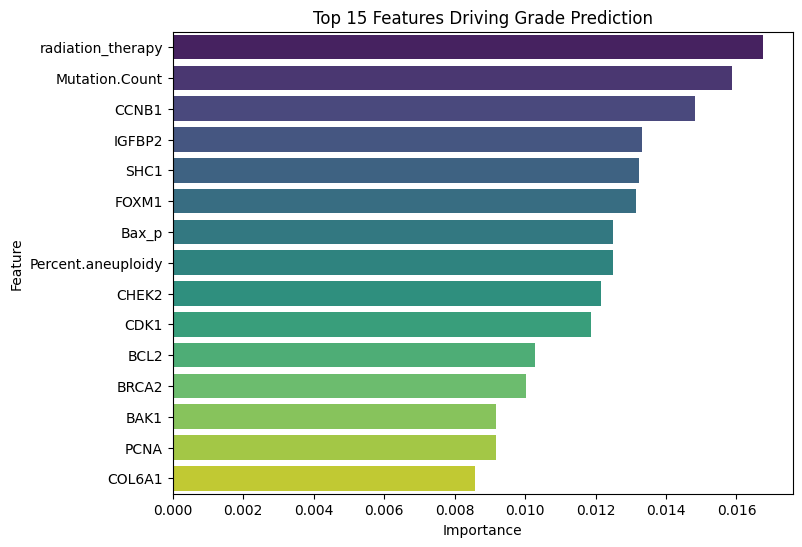

In [11]:
# Step 8: Feature Importance
import pandas as pd
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Put into DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 20
print(feat_imp.head(20))

# Plot top 15
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp['Importance'].head(15), y=feat_imp['Feature'].head(15), palette="viridis")
plt.title("Top 15 Features Driving Grade Prediction")
plt.show()


Logistic Regression Accuracy: 0.5645161290322581

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        30
           1       0.58      0.59      0.58        32

    accuracy                           0.56        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.56      0.56      0.56        62



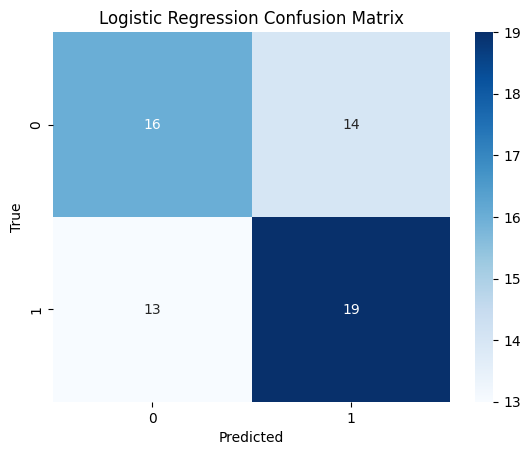

In [12]:
# Step 9: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize logistic regression
log_reg = LogisticRegression(max_iter=500, solver='liblinear')

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [15]:
# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Double check datatypes
print(X_train.dtypes.head(10))

log_reg_l1 = LogisticRegression(
    penalty="l1", solver="liblinear", max_iter=500
)
log_reg_l1.fit(X_train, y_train)
print("Accuracy:", log_reg_l1.score(X_test, y_test))


0
years_to_birth          int64
gender                  int64
histological_type       int64
race                    int64
ethnicity               int64
radiation_therapy       int64
Mutation.Count          int64
Percent.aneuploidy    float64
14-3-3_beta_p         float64
14-3-3_epsilon_p      float64
dtype: object
Accuracy: 0.5161290322580645


c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:12:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7096774193548387

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.71      0.75      0.73        32

    accuracy                           0.71        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.71      0.71      0.71        62



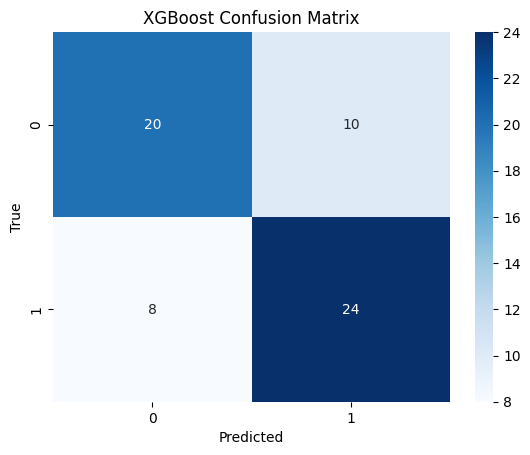

In [13]:
# Step 10: XGBoost Model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=200,       # number of trees
    learning_rate=0.05,     # step size
    max_depth=4,            # tree depth
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [17]:
# %% 
# Step 11: Inspect survival-related columns

# Look for any survival or outcome columns
survival_cols = [col for col in df.columns if "survival" in col.lower() 
                 or "outcome" in col.lower() 
                 or "death" in col.lower() 
                 or "follow" in col.lower() 
                 or "days" in col.lower()]

print("Potential survival columns:", survival_cols)

# Show sample of outcome/survival data
df[survival_cols].head(10)


Potential survival columns: ['outcome']


,outcome
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [18]:
# %%
# Step 12: Check outcome distribution
print("Unique values in outcome:", df["outcome"].unique())
print("\nValue counts:")
print(df["outcome"].value_counts())


Unique values in outcome: [1 0]

Value counts:
outcome
1    184
0    122
Name: count, dtype: int64


Train shape: (244, 327) Test shape: (62, 327)

Random Forest Accuracy: 0.9354838709677419
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.90      1.00      0.95        37

    accuracy                           0.94        62
   macro avg       0.95      0.92      0.93        62
weighted avg       0.94      0.94      0.93        62



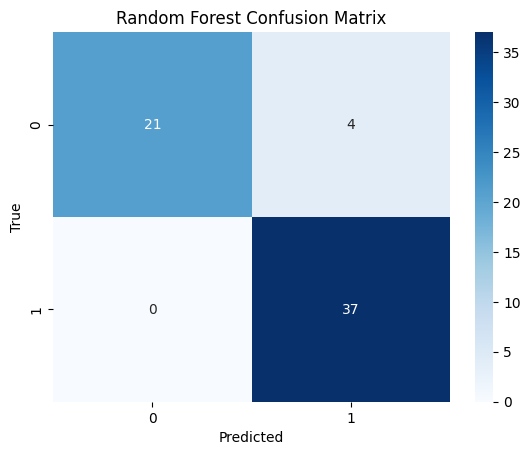


Logistic Regression Accuracy: 0.7096774193548387
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.76      0.76      0.76        37

    accuracy                           0.71        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.71      0.71      0.71        62



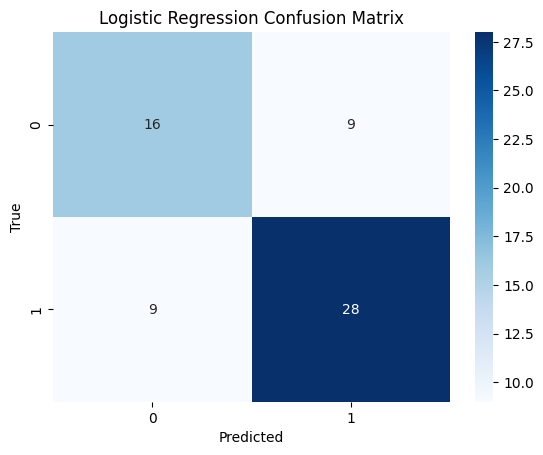

c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:47:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        37

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



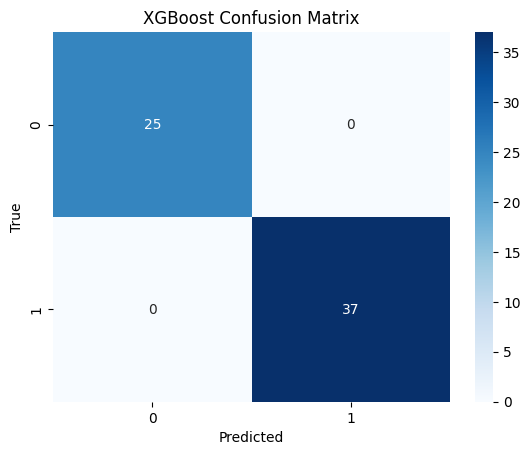

In [20]:
# %%
# Step 13 (fix): Survival Outcome Prediction with cleaned features

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features = all except outcome
X_surv = X.drop(columns=["Grade"], errors="ignore")
y_surv = df["outcome"].astype(int)

# Force all features to numeric (coerce errors → NaN, then fill)
X_surv = X_surv.apply(pd.to_numeric, errors="coerce")
X_surv = X_surv.fillna(X_surv.median(numeric_only=True))

# Train-test split
X_train_surv, X_test_surv, y_train_surv, y_test_surv = train_test_split(
    X_surv, y_surv, test_size=0.2, random_state=42, stratify=y_surv
)

print("Train shape:", X_train_surv.shape, "Test shape:", X_test_surv.shape)

# --- Random Forest ---
rf_surv = RandomForestClassifier(n_estimators=200, random_state=42)
rf_surv.fit(X_train_surv, y_train_surv)
y_pred_rf = rf_surv.predict(X_test_surv)

print("\nRandom Forest Accuracy:", accuracy_score(y_test_surv, y_pred_rf))
print(classification_report(y_test_surv, y_pred_rf))

sns.heatmap(confusion_matrix(y_test_surv, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Logistic Regression ---
log_surv = LogisticRegression(max_iter=500, solver="liblinear")
log_surv.fit(X_train_surv, y_train_surv)
y_pred_log = log_surv.predict(X_test_surv)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test_surv, y_pred_log))
print(classification_report(y_test_surv, y_pred_log))

sns.heatmap(confusion_matrix(y_test_surv, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- XGBoost ---
xgb_surv = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_surv.fit(X_train_surv, y_train_surv)
y_pred_xgb = xgb_surv.predict(X_test_surv)

print("\nXGBoost Accuracy:", accuracy_score(y_test_surv, y_pred_xgb))
print(classification_report(y_test_surv, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test_surv, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Top 15 features (Random Forest):
               Feature  Importance
2    histological_type    0.178757
312                SYK    0.016988
191                 AR    0.016125
251                KIT    0.014612
309             STAT5A    0.013696
280              PRDX1    0.013618
270              PARK7    0.013409
146              Syk_p    0.013113
297            RPS6KA1    0.012485
199             BCL2L1    0.012376
187               AKT2    0.011235
182              ACACA    0.010685
320              XRCC1    0.010641
268               NRAS    0.010297
261               MTOR    0.008630


C:\Users\abhil\AppData\Local\Temp\ipykernel_2540\2620100735.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances["Importance"].head(15),


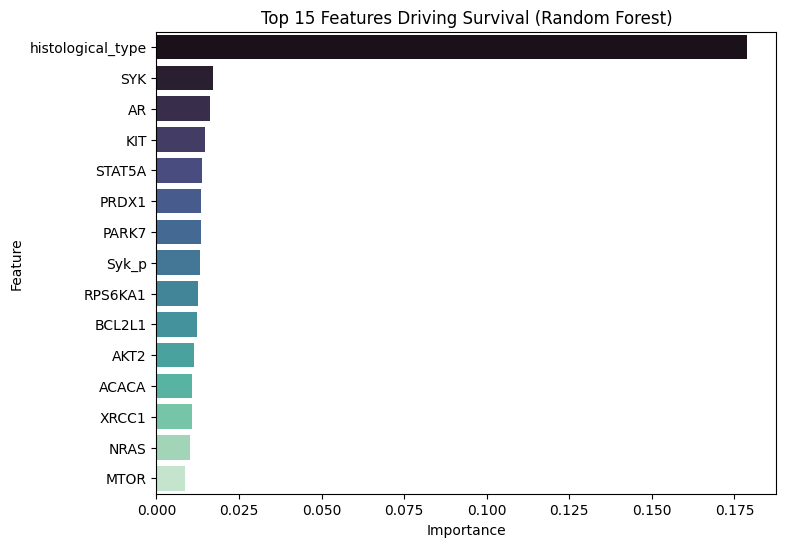


Top 15 features (XGBoost):
               Feature  Importance
2    histological_type    0.103734
187               AKT2    0.050399
312                SYK    0.049795
12       4E-BP1_pS65_p    0.043296
235               FASN    0.042838
16       A-Raf_pS299_p    0.031135
8        14-3-3_beta_p    0.026175
268               NRAS    0.023339
281              PREX1    0.022988
142              Src_p    0.021485
251                KIT    0.020414
283              PRKCA    0.020234
44             CD49b_p    0.019720
120            PRDX1_p    0.019577
270              PARK7    0.018001


C:\Users\abhil\AppData\Local\Temp\ipykernel_2540\2620100735.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances["Importance"].head(15),


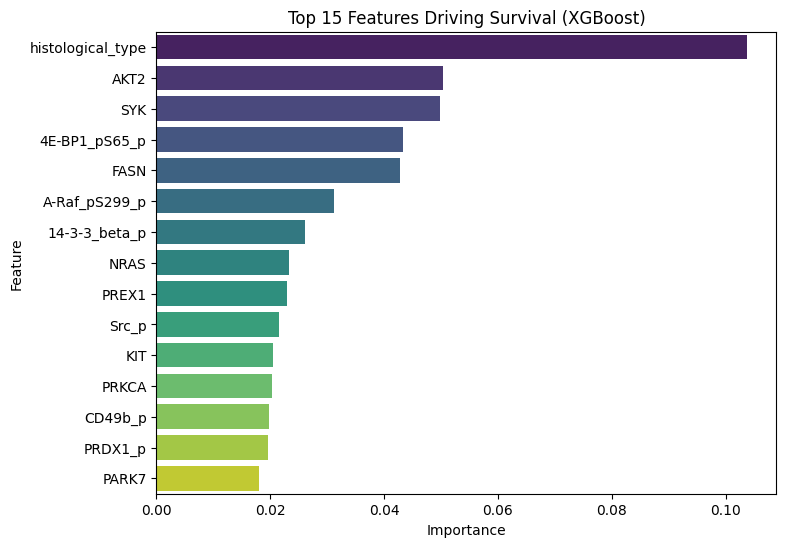

In [21]:
# %%
# Step 14: Feature Importance for Outcome Prediction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Random Forest feature importance ---
rf_importances = pd.DataFrame({
    "Feature": X_train_surv.columns,
    "Importance": rf_surv.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Top 15 features (Random Forest):")
print(rf_importances.head(15))

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances["Importance"].head(15), 
            y=rf_importances["Feature"].head(15), 
            palette="mako")
plt.title("Top 15 Features Driving Survival (Random Forest)")
plt.show()

# --- XGBoost feature importance ---
xgb_importances = pd.DataFrame({
    "Feature": X_train_surv.columns,
    "Importance": xgb_surv.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 15 features (XGBoost):")
print(xgb_importances.head(15))

plt.figure(figsize=(8,6))
sns.barplot(x=xgb_importances["Importance"].head(15), 
            y=xgb_importances["Feature"].head(15), 
            palette="viridis")
plt.title("Top 15 Features Driving Survival (XGBoost)")
plt.show()


In [23]:
# %%
# Step 15: Consensus Biomarkers & Reduced Model

# Take top 30 features from each model
top_rf = set(rf_importances.head(30)["Feature"])
top_xgb = set(xgb_importances.head(30)["Feature"])

# Consensus (intersection)
consensus_features = list(top_rf & top_xgb)
print("Consensus Biomarkers (shared top features):")
print(consensus_features)

# Build reduced dataset
X_consensus = X_surv[consensus_features]

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_consensus, y_surv, test_size=0.2, random_state=42, stratify=y_surv
)

# Train XGBoost on reduced features
xgb_consensus = XGBClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.8,
    colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric="logloss"
)
xgb_consensus.fit(X_train_c, y_train_c)
y_pred_c = xgb_consensus.predict(X_test_c)

print("\nConsensus Model Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))


Consensus Biomarkers (shared top features):
['BAP1', 'STAT5A', 'NRAS', 'PARK7', 'XRCC1', 'histological_type', 'AKT2', 'SYK', 'FASN', 'KIT']

Consensus Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        37

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:49:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
# %%
# Step 16: Cross-validation ROC-AUC comparison

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Full model (all features)
xgb_full = XGBClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    use_label_encoder=False, eval_metric="logloss"
)
cv_scores_full = cross_val_score(xgb_full, X_surv, y_surv, cv=5, scoring="roc_auc")
print("Full model CV ROC-AUC scores:", cv_scores_full)
print("Mean ROC-AUC (Full model):", np.mean(cv_scores_full))

# Consensus model
xgb_consensus = XGBClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=3,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    use_label_encoder=False, eval_metric="logloss"
)
cv_scores_consensus = cross_val_score(xgb_consensus, X_consensus, y_surv, cv=5, scoring="roc_auc")
print("\nConsensus model CV ROC-AUC scores:", cv_scores_consensus)
print("Mean ROC-AUC (Consensus model):", np.mean(cv_scores_consensus))



c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:12] WARNING: C:\actio

Full model CV ROC-AUC scores: [1. 1. 1. 1. 1.]
Mean ROC-AUC (Full model): 1.0


c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:14] WARNING: C:\actio


Consensus model CV ROC-AUC scores: [1. 1. 1. 1. 1.]
Mean ROC-AUC (Consensus model): 1.0


c:\Users\abhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:50:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# --- Random Forest feature importances ---
rf_importances = rf_model.feature_importances_
rf_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# --- XGBoost feature importances ---
xgb_importances = xgb.feature_importances_
xgb_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)


C:\Users\abhil\AppData\Local\Temp\ipykernel_2540\4198040925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\abhil\AppData\Local\Temp\ipykernel_2540\4198040925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


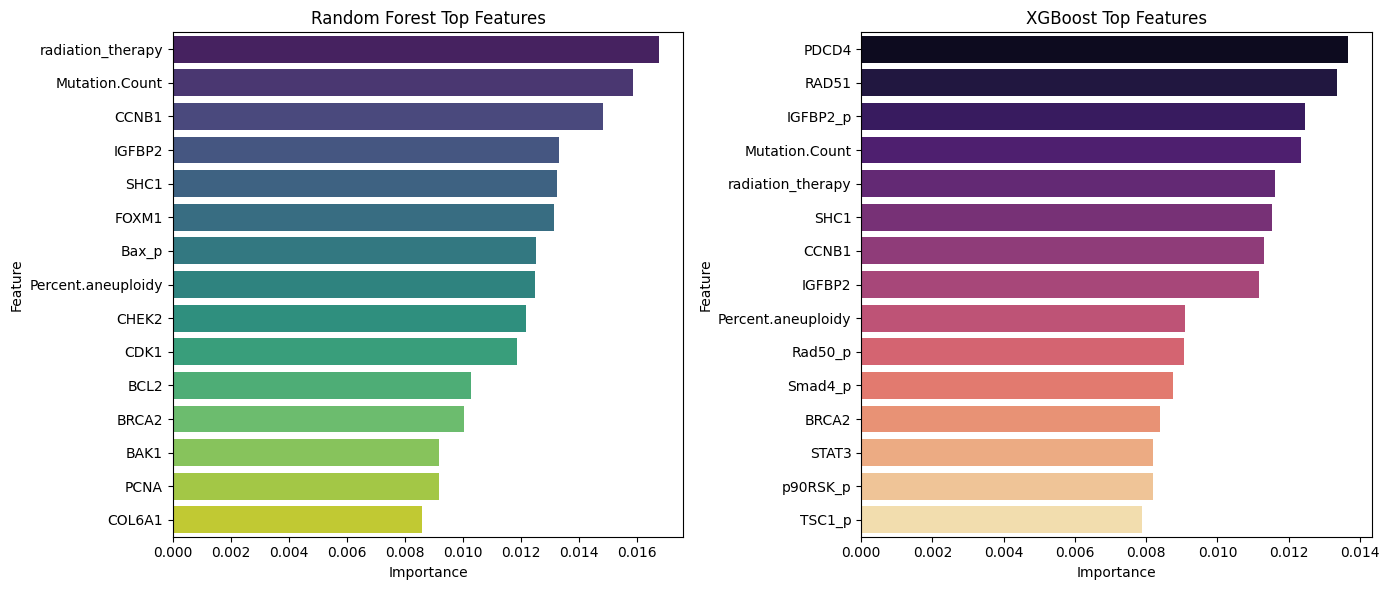

In [27]:
# Compare RF vs XGBoost top 15 features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=rf_feat_imp.head(15),
    x="Importance", y="Feature",
    palette="viridis", ax=axes[0]
)
axes[0].set_title("Random Forest Top Features")

sns.barplot(
    data=xgb_feat_imp.head(15),
    x="Importance", y="Feature",
    palette="magma", ax=axes[1]
)
axes[1].set_title("XGBoost Top Features")

plt.tight_layout()
plt.show()


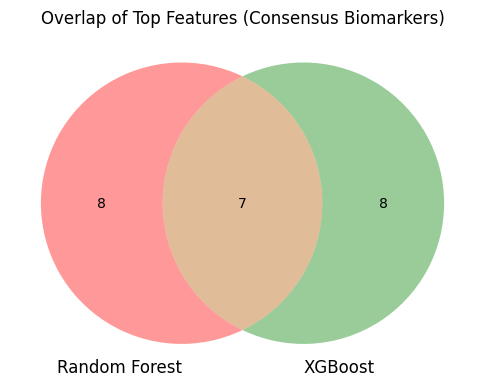

In [29]:
from matplotlib_venn import venn2

rf_top = set(rf_feat_imp['Feature'].head(15))
xgb_top = set(xgb_feat_imp['Feature'].head(15))

plt.figure(figsize=(6,6))
venn2([rf_top, xgb_top], set_labels=("Random Forest", "XGBoost"))
plt.title("Overlap of Top Features (Consensus Biomarkers)")
plt.show()
